In [74]:
import pandas as pd

In [75]:
dirr = 'C:/Users/shic/Desktop/shinhan_simon/google_drive/crawler_data/'

In [76]:
auction = pd.read_csv(dirr+'court/RAA_법원경매통계_유승훈.csv')
auction.reset_index(drop=True,inplace=True)
auction

,ACTN_THNG_PRPS_BCLAS_CODE,ACTN_THNG_PRPS_SCLAS_CODE,SIDONM,SIGNGU_NM,BASE_YM,ACTN_ITMN,DISP_ITMN,ESTM_PRICE,DISP_PRICE,DISP_RT,DISP_VLUE_RT
0,7,0,강원도,강릉시,201201,0.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
1,7,0,강원도,강릉시,201202,0.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
2,7,0,강원도,강릉시,201203,0.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
3,7,0,강원도,강릉시,201204,0.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
4,7,0,강원도,강릉시,201205,0.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
579020,0,0,충청북도,충주시,202103,100.0,42.0,3.637935e+09,2.291155e+09,0.420,0.630
579021,0,0,충청북도,충주시,202104,59.0,29.0,3.974281e+09,2.642680e+09,0.492,0.665
579022,0,0,충청북도,충주시,202105,56.0,20.0,6.770141e+09,3.441992e+09,0.357,0.508
579023,0,0,충청북도,충주시,202106,30.0,9.0,7.105793e+08,5.893763e+08,0.300,0.829


In [83]:
aa = auction[(auction['ACTN_THNG_PRPS_BCLAS_CODE']==1)&(auction['SIDONM']=='경기도')]
aa['BASE_YM'] = pd.to_datetime(aa['BASE_YM'],format='%Y%m')
aa

C:\Users\shic\anaconda3\envs\simon_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ACTN_THNG_PRPS_BCLAS_CODE,ACTN_THNG_PRPS_SCLAS_CODE,SIDONM,SIGNGU_NM,BASE_YM,ACTN_ITMN,DISP_ITMN,ESTM_PRICE,DISP_PRICE,DISP_RT,DISP_VLUE_RT
459195,1,0,경기도,가평군,2012-01-01,1.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
459196,1,0,경기도,가평군,2012-02-01,1.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
459197,1,0,경기도,가평군,2012-03-01,3.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
459198,1,0,경기도,가평군,2012-04-01,3.0,0.0,0.000000e+00,0.000000e+00,0.000,0.000
459199,1,0,경기도,가평군,2012-05-01,7.0,3.0,4.600000e+08,3.236500e+08,0.428,0.704
...,...,...,...,...,...,...,...,...,...,...,...
464825,1,0,경기도,화성시,2021-03-01,18.0,13.0,3.929000e+09,3.142553e+09,0.722,0.800
464826,1,0,경기도,화성시,2021-04-01,12.0,11.0,3.207000e+09,3.557228e+09,0.917,1.109
464827,1,0,경기도,화성시,2021-05-01,10.0,7.0,1.217200e+09,1.543585e+09,0.700,1.268
464828,1,0,경기도,화성시,2021-06-01,13.0,12.0,4.476000e+09,5.833311e+09,0.923,1.303


In [81]:
import seaborn as sns

<AxesSubplot:xlabel='BASE_YM', ylabel='DISP_ITMN'>

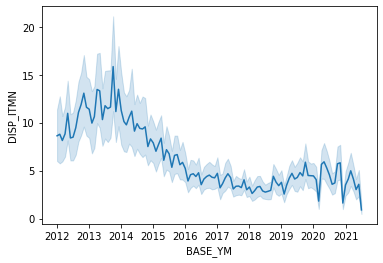

In [84]:
sns.lineplot(data=aa,x='BASE_YM',y='DISP_ITMN')